# Introduction:

In this Notebook, we calculate the following quantities: 
* Periodic nominal returns (returns over a holding period) of a security, from the security price (in base currency) and the dividends (also in base currency) history. It  given by

$$ R^{nominal}_t = \frac{P_t - P_{t-1} + D_t}{P_{t-1}},$$

* Inflation rates over a holding period associated with the base currency, from the Consummer Price Index data: 

$$ I_t = \frac{CPI_t - CPI_{t-1}}{CPI_{t-1}}.$$


* Periodic real returns of a security, which are adjusted for infation: 

$$ R_t^{real} = \frac{1 + R_t^{nominal}}{1+ I_t} - 1$$.


As investors, we are interested in the performance of an investment over time (or a backtesting window). We need to calculate the cumulative rates of returns. This is achieved by dividing the invetsment horizon period (or the backtesting window) into multiple periods, computing the single periods of returns, then compounding these single period of returns: 


$$ R_T^{nom, cum} = \prod_{t=0}^T(1 + R^{nominal}_t)- 1$$


Inflation also compounds over time and it builds on the previous price levels: One dollar in 2000 worth less than one dollar in 2022. In order to calculate the cumulative inflation over a period of time, the cumulative inflation factor ($CIF$) is commongly used as a metric: 

$$ CIF_T = \prod_{t=0}^T(1 + I_t)$$


In order to calulate the real cumulative returns over a period of time, we need to discount the cumulative nominal returns using the $CIF$:

$$ R_T^{real, cum} = \frac{R_T^{nom, cum}}{CIF_T}$$.


Cumulative inflation helps assess how much your purchasing power has eroded over time. Therefore, real returns is a better performance performance metric from investment point of view. 


The Notebook calculations are straightforward. All the functions are implemented in the utils.py script. Here, we chose:
* The base currency as USD and the associated inflation curve. Therefore, all the securities that are not quoted in the USD must be converted first to USD prices using the corresponding FX curve.
* The holding period is one month.
* The following securities: 
    -  Equities: Index ETFs (S&P500, CSSMI.SW, ISL.L) paying dividends and quoted in (USD, CHF, GBp) respectively
    -  Gold: ETF tracking physical gold, not paying dividends
    -  Bitcoin: the cryptocurrency, not paying dividends

# Next steps:


*   Change the base currency and see how returns are affected
*   Study the correlations between the indices
*   Scale some cells: transform them into modules: periodic return calculation from daily returns
*   Calculate the inflation adjusted returns for each strategy
*   Calculate the evolution of the portfolio weights within the class
*   Realistic scenario for cash treatment (savings account)





In [3]:
import warnings
warnings.filterwarnings('ignore')
from Returns_Calculation import utils as utils
import datetime as dt
from datetime import date, timedelta
import pandas as pd

# Nominal returns vs Real (Inflation Adjusted) returns

In [28]:
# Set the inputs:
# - Define the size of the backtesting window in years
Size = 18 # The size of the backtesting window in years

# Calculate the end date for the backtesting period, avoiding the last day to prevent API issues
end_date = date.today() - timedelta(days=7) # Try to avoid the last day because of possible API issues

# Calculate the start date by subtracting the backtesting window size from the end date
start_date = end_date.replace(year=end_date.year - Size)

# Define the base currency for the financial data
base_currency = 'USD'

# Print the calculated start and end dates for verification
print("Start date: ", start_date)
print("End date: ", end_date)

# Define the inflation curve to be used in the analysis
inflation_curve = 'CPIAUCSL'

# List of tickers for the assets to be analyzed
Tickers = ['SPY', 'CSSMI.SW', 'ISF.L', 'IAU', 'BTC-USD'] # 'SPY' corresponds to the S&P500 distributing index ETF and 'IAU' corresponds to the Index Physical Gold Trust ETF. Both quotes in the USD. The third ticker stands for Bitcoin.

# List of foreign exchange tickers for currency analysis
FX_Tickers = ['CHFUSD=X', 'GBPUSD=X']

initial_investment = 10000  # Example initial investment

Start date:  2006-10-01
End date:  2024-10-01


In [9]:
# Initialize dictionaries to store price data, dividend data, and foreign exchange (FX) data for each ticker
prices_dfs = {}
dividends_dfs = {}
FX_dfs = {}

# Loop through each ticker in the list of Tickers to fetch historical price and dividend data
for ticker in Tickers:
    print()  # Print a new line for better readability in the output
    print(f"Fetching data for {ticker}...\n")  # Indicate which ticker's data is being fetched
    # Fetch historical price data for the current ticker and store it in the prices_dfs dictionary
    prices_dfs[ticker] = utils.fetch_historical_data(ticker, start_date, end_date)
    # Fetch historical dividend data for the current ticker and store it in the dividends_dfs dictionary
    dividends_dfs[ticker] = utils.fetch_historical_dividends(ticker, start_date, end_date)

# Loop through each ticker in the list of FX_Tickers to fetch foreign exchange data
for ticker in FX_Tickers:
    print()  # Print a new line for better readability in the output
    print(f"Fetching data for {ticker}...\n")  # Indicate which FX ticker's data is being fetched
    # Fetch foreign exchange data for the current FX ticker and store it in the FX_dfs dictionary
    FX_dfs[ticker] = utils.fetch_FX_data(ticker, start_date, end_date)

# Fetch inflation data based on the specified inflation curve and date range
inflation_df = utils.fetch_inflation_data(inflation_curve, start_date, end_date)


Fetching data for SPY...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for CSSMI.SW...




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Fetching data for ISF.L...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Fetching data for IAU...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No dividends found for the selected period.

Fetching data for BTC-USD...

No dividends found for the selected period.

Fetching data for CHFUSD=X...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Fetching data for GBPUSD=X...



In [11]:
# Printing the first rows of the dfs

for ticker, prices_df in prices_dfs.items():
    print(f"Prices for {ticker}:")
    print(prices_df.head())

for ticker, dividends_df in dividends_dfs.items():
    print(f"Dividends for {ticker}:")
    print(dividends_df.head())
for ticker, FX_df in FX_dfs.items():
    print(f"FX for {ticker}:")
    print(FX_df.head())

print("CPI :\n")
print(inflation_df.head())

Prices for SPY:
        Date      Price
0 2006-10-02  94.457428
1 2006-10-03  94.656197
2 2006-10-04  95.763435
3 2006-10-05  95.947990
4 2006-10-06  95.827332
Prices for CSSMI.SW:
        Date      Price
0 2008-01-03  59.979435
1 2008-01-04  58.616707
2 2008-01-07  58.474602
3 2008-01-08  59.958565
4 2008-01-09  60.126747
Prices for ISF.L:
        Date       Price
0 2009-01-02  456.429382
1 2009-01-05  458.171539
2 2009-01-06  463.397797
3 2009-01-07  449.460938
4 2009-01-08  450.207550
Prices for IAU:
        Date   Price
0 2006-10-02  11.820
1 2006-10-03  11.430
2 2006-10-04  11.274
3 2006-10-05  11.392
4 2006-10-06  11.370
Prices for BTC-USD:
        Date       Price
0 2014-09-17  457.334015
1 2014-09-18  424.440002
2 2014-09-19  394.795990
3 2014-09-20  408.903992
4 2014-09-21  398.821014
Dividends for SPY:
        Date  Dividend
0 2006-12-15     0.793
1 2007-03-16     0.551
2 2007-06-15     0.656
3 2007-09-21     0.719
4 2007-12-21     0.775
Dividends for CSSMI.SW:
        Date  

We convert the prices of securitied quoted in a currency other than the base currency using the FX rates. For UK securities, prices are rescaled to GBP if they are quoted in GBps before the conversion to the base currency.

In [15]:
transformed_prices_dfs, transformed_dividends_dfs = utils.uniform_price_and_dividend_data(Tickers, prices_dfs, dividends_dfs, FX_dfs, base_currency)
for ticker, prices_df in transformed_prices_dfs.items():
    print(f"Prices for {ticker}:")
    print(prices_df.head())

Prices for SPY:
        Date      Price
0 2006-10-02  94.457428
1 2006-10-03  94.656197
2 2006-10-04  95.763435
3 2006-10-05  95.947990
4 2006-10-06  95.827332
Prices for CSSMI.SW:
        Date      Price
0 2008-01-03  53.962603
1 2008-01-04  52.946172
2 2008-01-07  52.312221
3 2008-01-08  53.909875
4 2008-01-09  53.867360
Prices for ISF.L:
        Date     Price
0 2009-01-02  6.629137
1 2009-01-05  6.742477
2 2009-01-06  6.910197
3 2009-01-07  6.777462
4 2009-01-08  6.855291
Prices for IAU:
        Date   Price
0 2006-10-02  11.820
1 2006-10-03  11.430
2 2006-10-04  11.274
3 2006-10-05  11.392
4 2006-10-06  11.370
Prices for BTC-USD:
        Date       Price
0 2014-09-17  457.334015
1 2014-09-18  424.440002
2 2014-09-19  394.795990
3 2014-09-20  408.903992
4 2014-09-21  398.821014


In [18]:
# Calculate daily and monthly returns


daily_returns_df, periodic_returns_df = utils.calculate_returns(Tickers, transformed_prices_dfs, transformed_dividends_dfs)
print(daily_returns_df.head())
print(periodic_returns_df.head())

monthly_returns_df = periodic_returns_df.copy()
Total_Returns_df =daily_returns_df.copy()    

# Calculate inflation rates 

inflation_rate_data = utils.calculate_inflation_rate(inflation_curve, inflation_df)
print(inflation_rate_data.head())

        Date       SPY  CSSMI.SW  ISF.L       IAU  BTC-USD
0 2006-10-02       NaN       NaN    NaN       NaN      NaN
1 2006-10-03  0.002104       NaN    NaN -0.032995      NaN
2 2006-10-04  0.011697       NaN    NaN -0.013648      NaN
3 2006-10-05  0.001927       NaN    NaN  0.010467      NaN
4 2006-10-06 -0.001258       NaN    NaN -0.001931      NaN
        Date       SPY  CSSMI.SW  ISF.L       IAU  BTC-USD
0 2006-10-31  0.035392       0.0    0.0  0.017428      0.0
1 2006-11-30  0.019885       0.0    0.0  0.071345      0.0
2 2006-12-31  0.021281       0.0    0.0 -0.018162      0.0
3 2007-01-31  0.015040       0.0    0.0  0.025296      0.0
4 2007-02-28 -0.019617       0.0    0.0  0.025135      0.0
        Date  CPIAUCSL  InflationRate
0 2006-10-31   201.900            NaN
1 2006-11-30   202.000       0.000495
2 2006-12-31   203.100       0.005446
3 2007-01-31   203.437       0.001659
4 2007-02-28   204.226       0.003878


We merge inflation rate with securtiries returns.

In [22]:
merged_df = pd.merge(inflation_rate_data, monthly_returns_df, on='Date', how='inner')
merged_df = merged_df.dropna(subset=['InflationRate'])
monthly_data = merged_df.copy()
returns_df = merged_df.copy()
print(monthly_data.head())

        Date  CPIAUCSL  InflationRate       SPY  CSSMI.SW  ISF.L       IAU  \
1 2006-11-30   202.000       0.000495  0.019885       0.0    0.0  0.071345   
2 2006-12-31   203.100       0.005446  0.021281       0.0    0.0 -0.018162   
3 2007-01-31   203.437       0.001659  0.015040       0.0    0.0  0.025296   
4 2007-02-28   204.226       0.003878 -0.019617       0.0    0.0  0.025135   
5 2007-03-31   205.288       0.005200  0.017204       0.0    0.0 -0.009777   

   BTC-USD  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
5      0.0  


Calculate real returns (inflation adjusted returns)

Formula:

 $ \quad \quad \quad R_{real} = \frac{1 + R_{nominal}}{1+ InflationRate} - 1$.

Note that for the following tickers: CSSMI.SW, ISF.L and BTC-USD have zero returns in the earlier dates of the backtesting window as they are new compared to SPY and IAU.


We calculate the cumulative returns:
- Cumulative nominal returns
- Cumulative inflation
- Cumlative real returns

In [30]:
returns_df = utils.calculate_real_returns(Tickers,inflation_rate_data, monthly_returns_df)


cumulative_returns_df = utils.calculate_cumulative_returns(Tickers, returns_df)

value_df = utils.calculate_value_of_investment(initial_investment, cumulative_returns_df, Tickers)


Plot the different returns

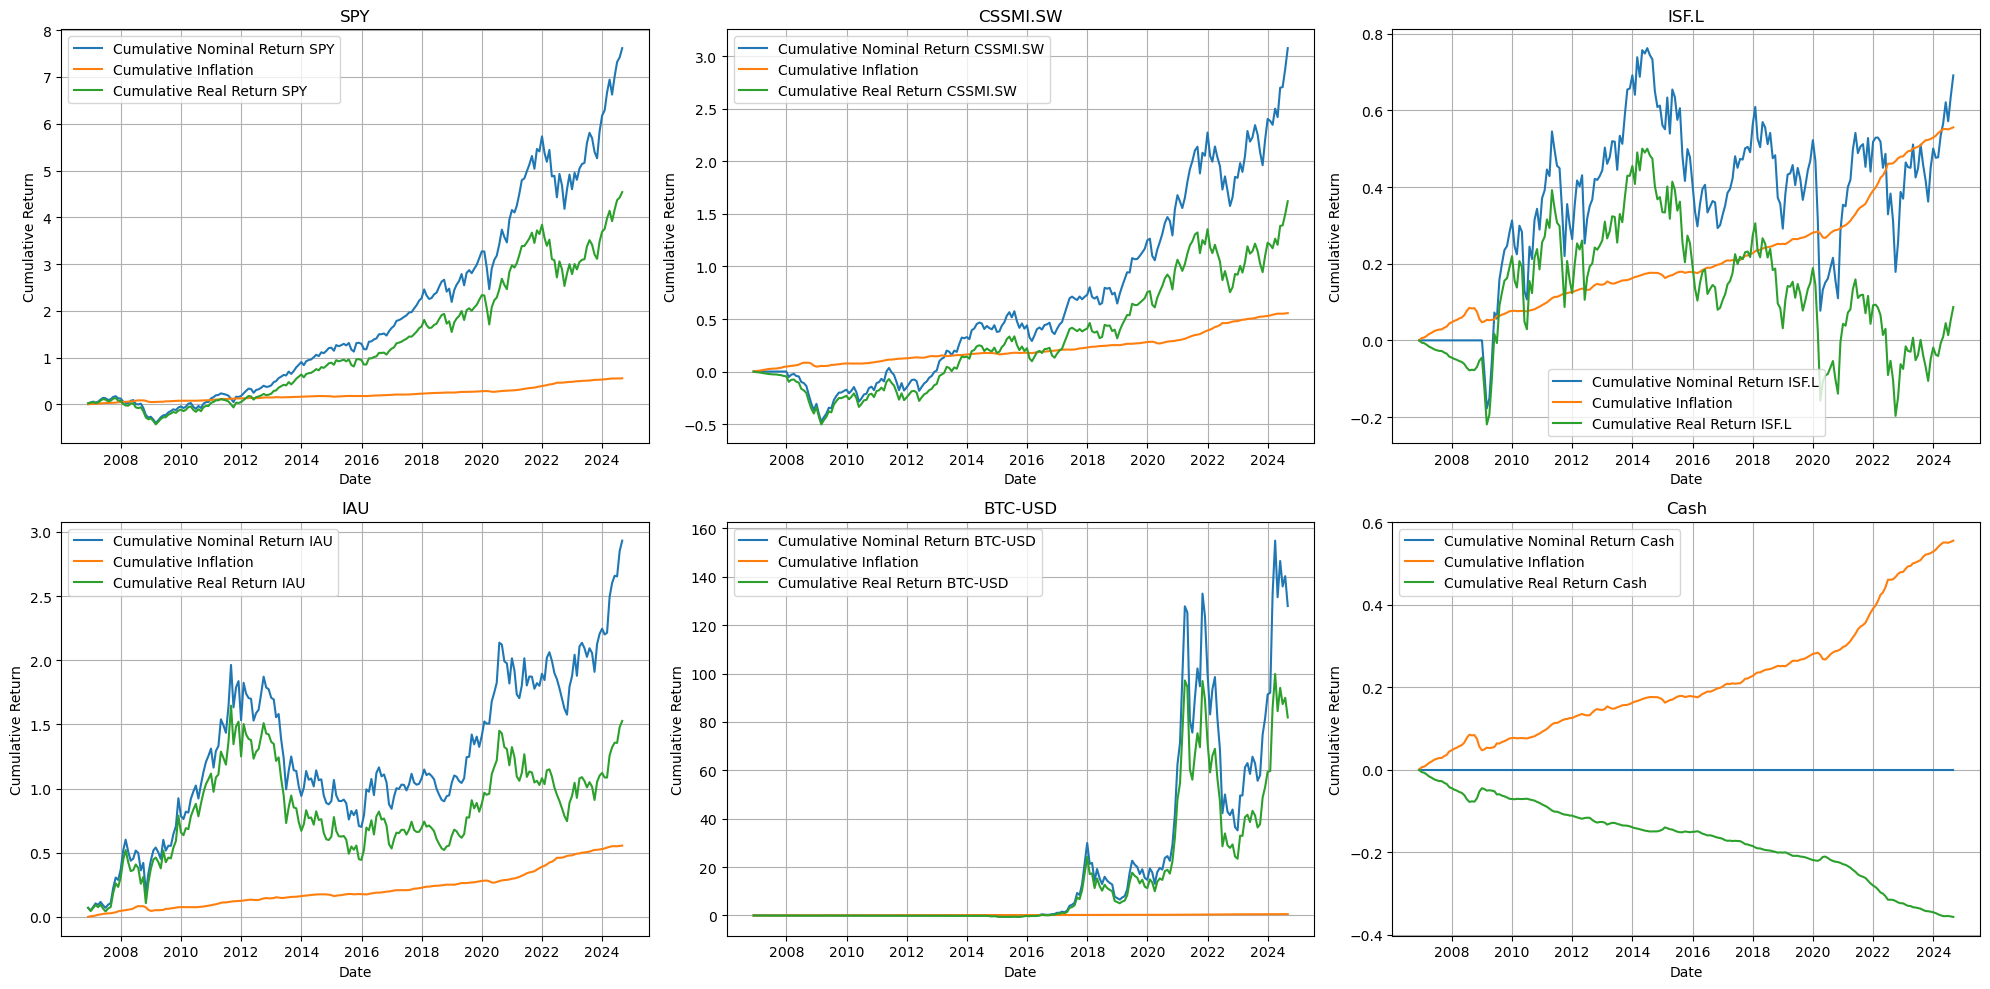

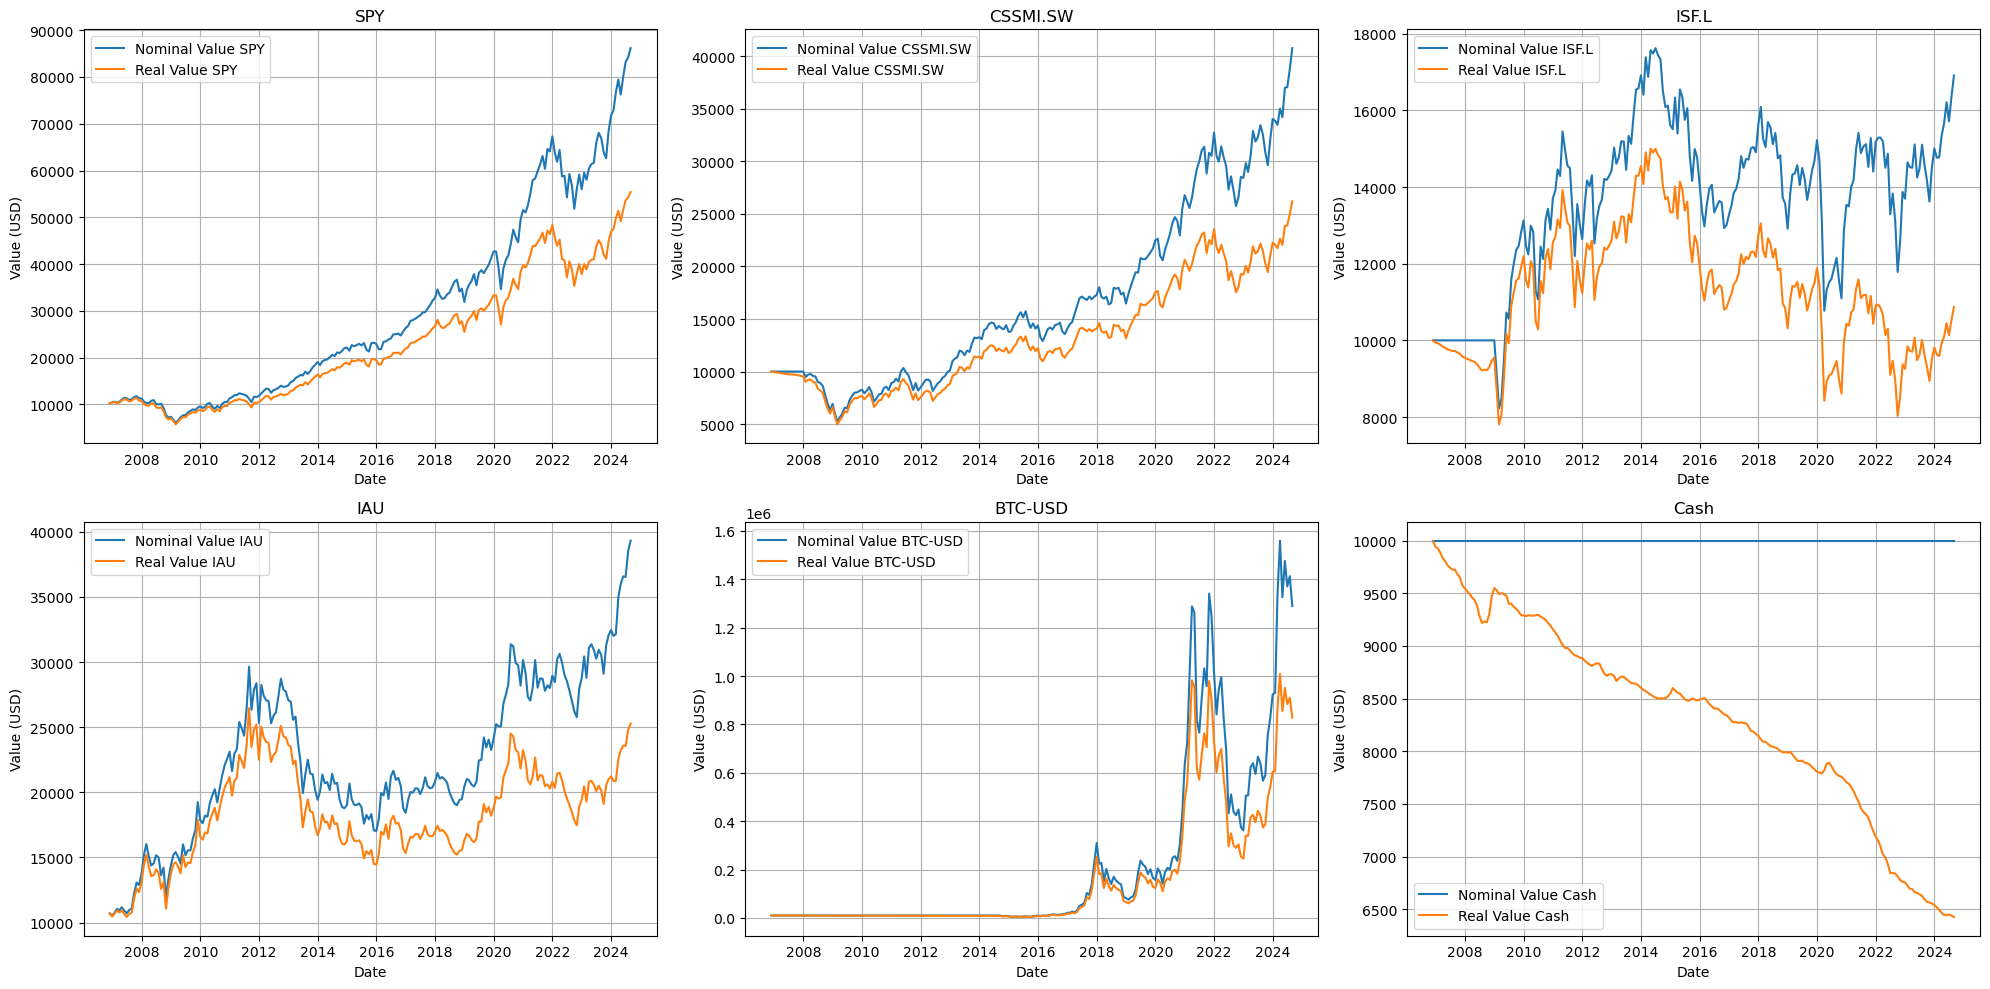

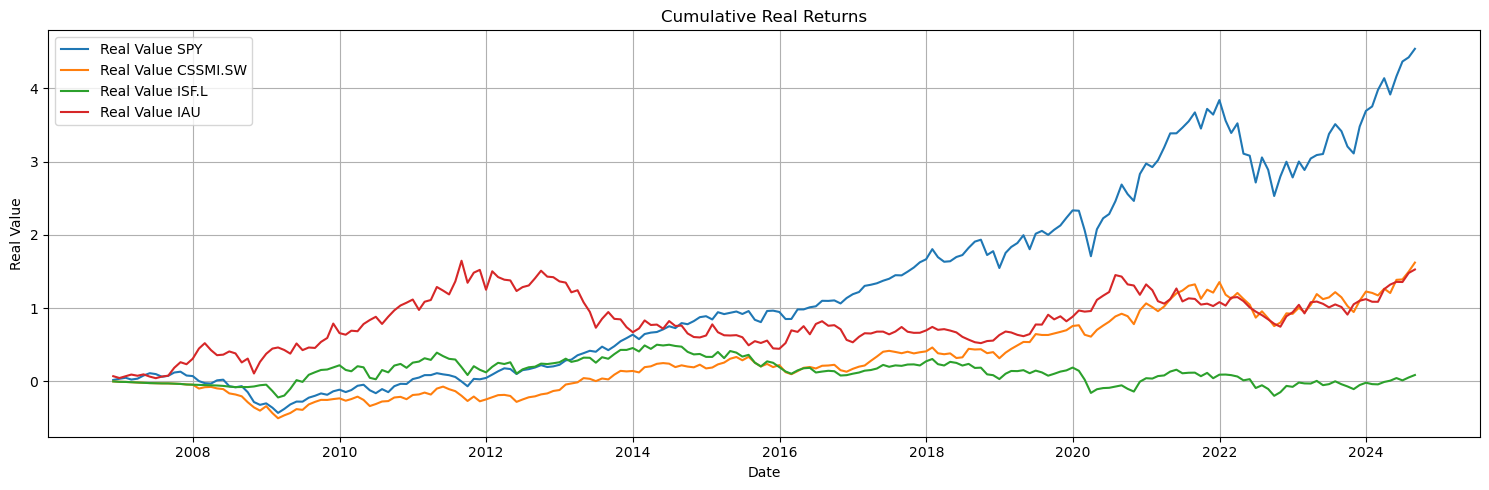

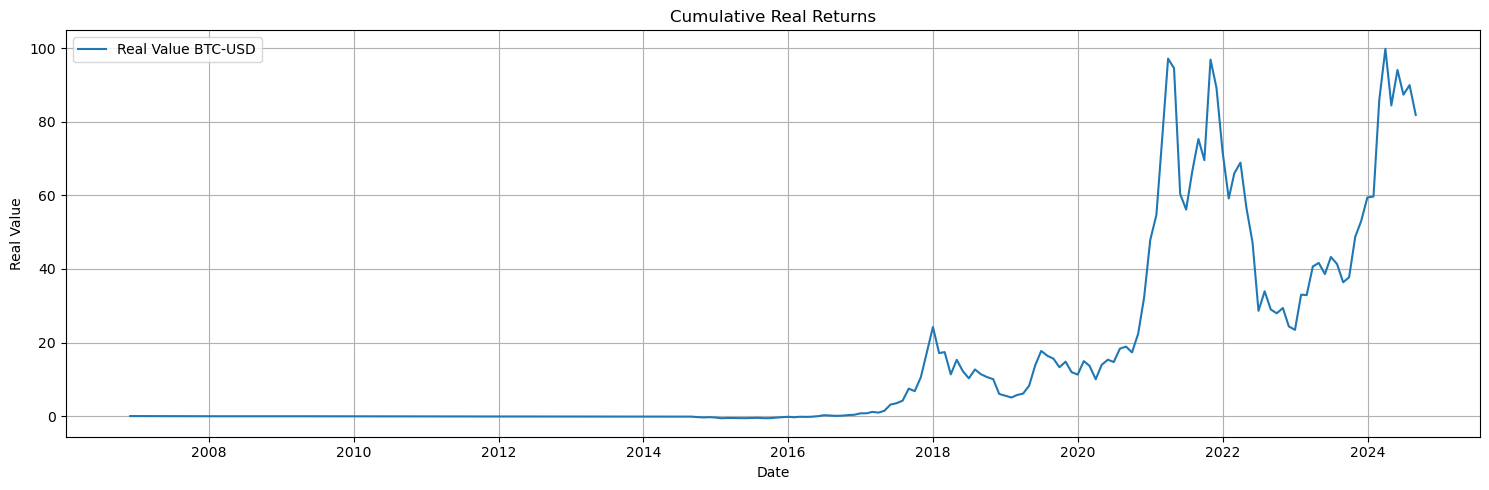

In [34]:
# Plotting the results

utils.plot_cumulative_returns(Tickers, cumulative_returns_df)

utils.plot_investment_growth(Tickers, value_df)

Tickers_no_bitcoin = Tickers.copy()
Tickers_no_bitcoin.remove('BTC-USD')
utils.plot_real_returns(Tickers_no_bitcoin, cumulative_returns_df)
utils.plot_real_returns(['BTC-USD'], cumulative_returns_df)


# Assessing: stationarity, normality and independence of daily log returns of the assets in the portfolio.

In [ ]:
daily_return = Total_Returns_df.copy()
daily_return.dropna(inplace=True)
daily_return = daily_return.set_index('Date')
print(daily_return.head())
log_returns = np.log(1 + daily_return)
print(log_returns.head())

                 SPY  CSSMI.SW     ISF.L       IAU   BTC-USD
Date                                                        
2014-09-18  0.002104 -0.022720  0.003817 -0.032995 -0.071926
2014-09-19  0.011698 -0.002425  0.011407 -0.013648 -0.069843
2014-09-20  0.001927  0.025379 -0.030075  0.010467  0.035735
2014-09-21 -0.001258  0.002805  0.001661 -0.001931 -0.024659
2014-09-22  0.000593 -0.005890 -0.012162  0.005629  0.008352
                 SPY  CSSMI.SW     ISF.L       IAU   BTC-USD
Date                                                        
2014-09-18  0.002102 -0.022982  0.003809 -0.033551 -0.074643
2014-09-19  0.011630 -0.002428  0.011342 -0.013742 -0.072402
2014-09-20  0.001925  0.025062 -0.030537  0.010412  0.035111
2014-09-21 -0.001259  0.002801  0.001660 -0.001933 -0.024968
2014-09-22  0.000593 -0.005907 -0.012236  0.005613  0.008317


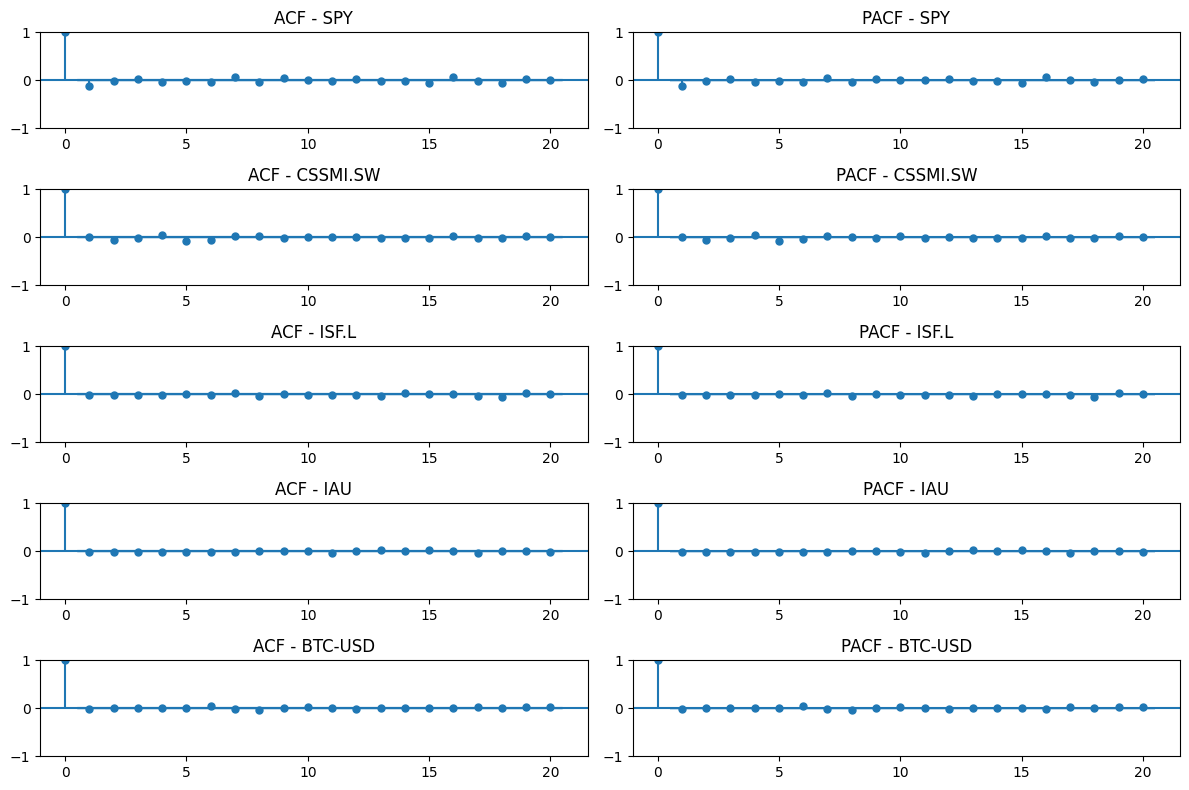

In [ ]:
import statsmodels.api as sm

# For each asset, plot ACF and PACF
fig, ax = plt.subplots(len(log_returns.columns), 2, figsize=(12, 8))

for i, asset in enumerate(log_returns.columns):
    sm.graphics.tsa.plot_acf(log_returns[asset], lags=20, ax=ax[i][0])
    sm.graphics.tsa.plot_pacf(log_returns[asset], lags=20, ax=ax[i][1])
    ax[i][0].set_title(f'ACF - {asset}')
    ax[i][1].set_title(f'PACF - {asset}')

plt.tight_layout()
plt.show()


Shapiro-Wilk test for SPY: p-value = 0.00000000
Shapiro-Wilk test for CSSMI.SW: p-value = 0.00000000
Shapiro-Wilk test for ISF.L: p-value = 0.00000000
Shapiro-Wilk test for IAU: p-value = 0.00000000
Shapiro-Wilk test for BTC-USD: p-value = 0.00000000


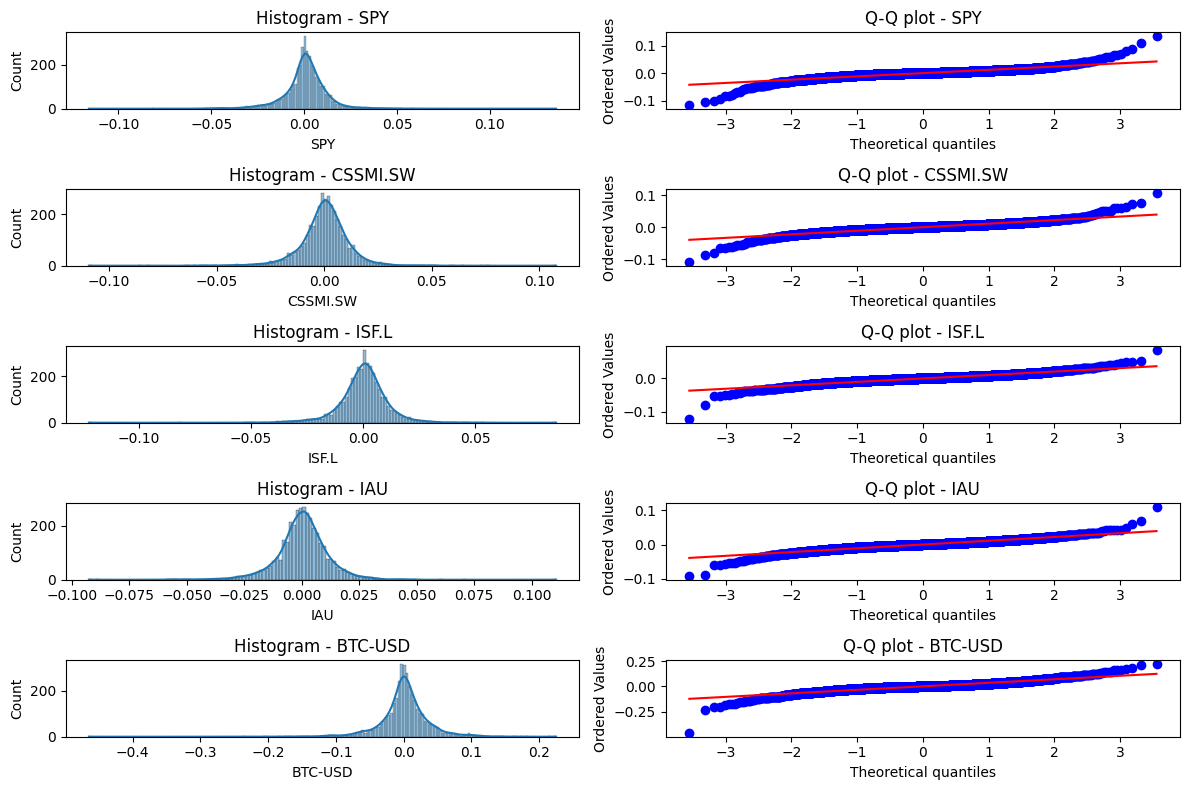

In [ ]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Shapiro-Wilk Test for normality
for asset in log_returns.columns:
    stat, p_value = stats.shapiro(log_returns[asset])
    print(f"Shapiro-Wilk test for {asset}: p-value = {p_value:.8f}")

fig, ax = plt.subplots(len(log_returns.columns), 2, figsize=(12, 8))

for i, asset in enumerate(log_returns.columns):
    sns.histplot(log_returns[asset], kde=True, ax=ax[i][0])
    ax[i][0].set_title(f'Histogram - {asset}')
    stats.probplot(log_returns[asset], dist="norm", plot=ax[i][1])
    ax[i][1].set_title(f'Q-Q plot - {asset}')

plt.tight_layout()
plt.show()



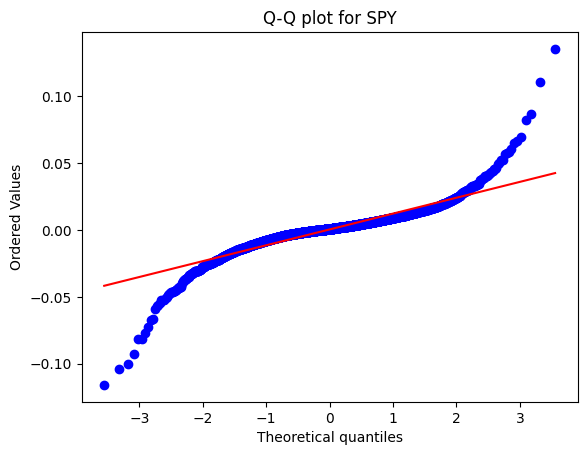

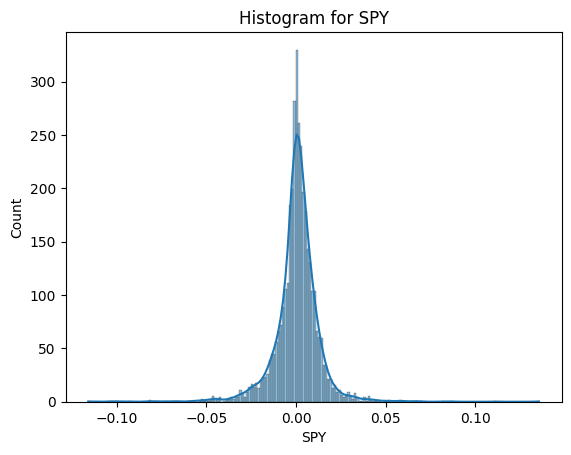

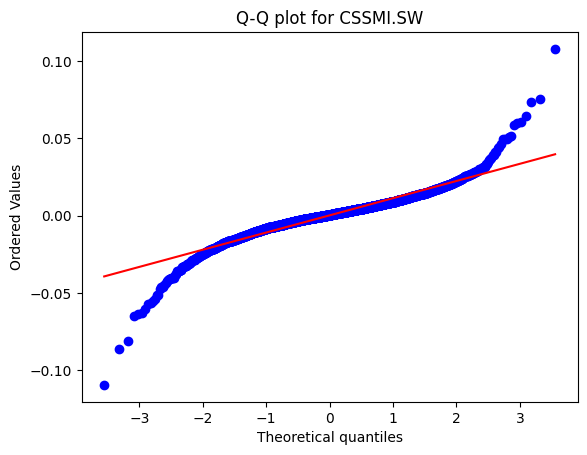

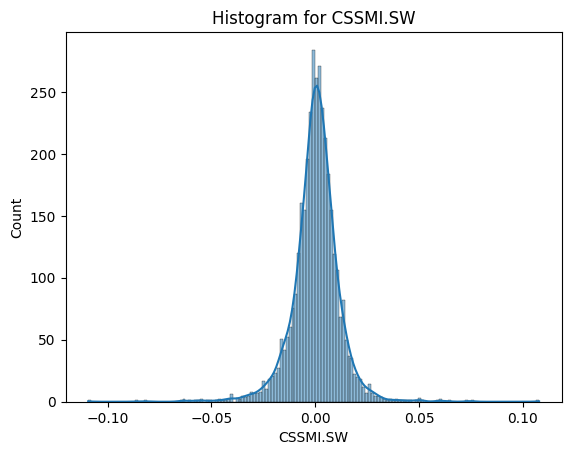

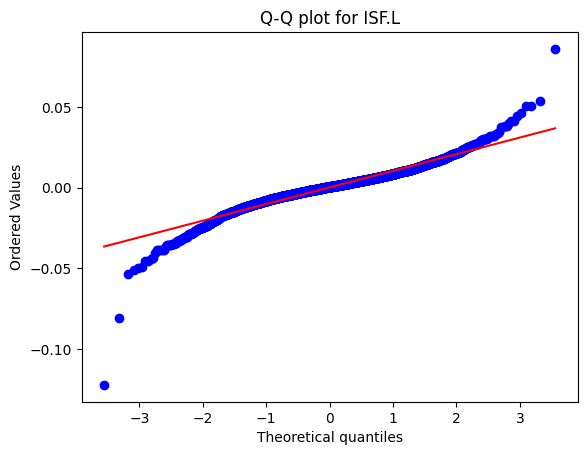

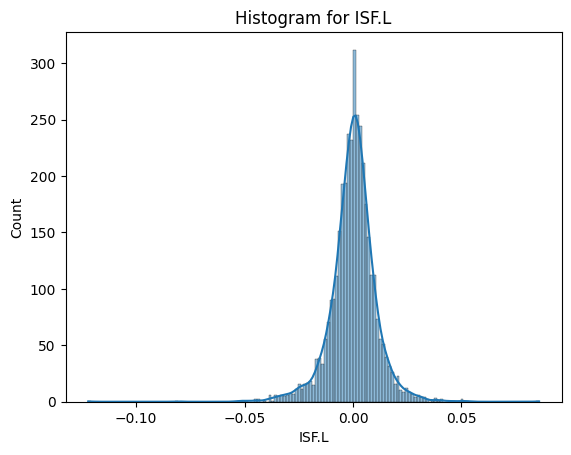

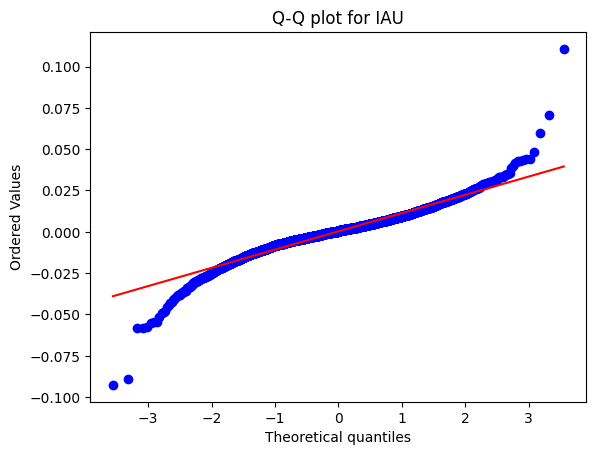

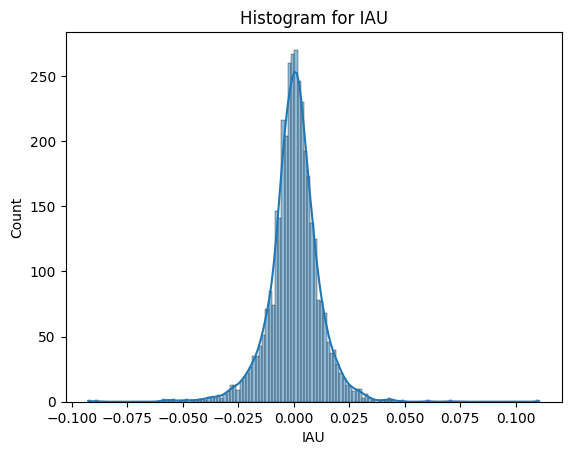

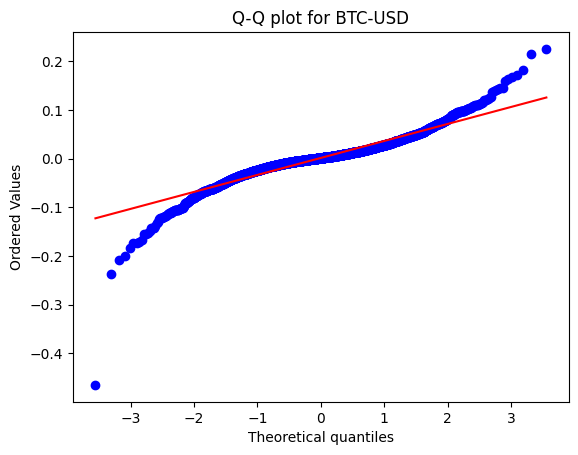

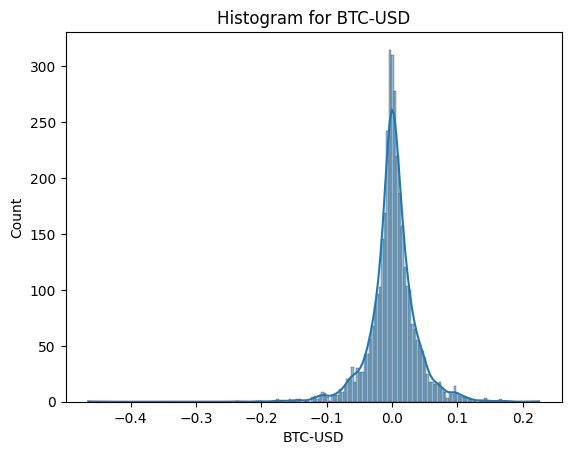

In [ ]:
# For more visibility, we re-plot

for asset in log_returns.columns:
  # Q-Q Plot

  stats.probplot(log_returns[asset], dist="norm", plot=plt)
  plt.title(f"Q-Q plot for {asset}")
  plt.show()

  # Histogram and Kernel Density Estimate (KDE)
  sns.histplot(log_returns[asset], kde=True)
  plt.title(f"Histogram for {asset}")
  plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

for asset in log_returns.columns:
    result = adfuller(log_returns[asset])
    print(f"ADF Test for {asset}: p-value = {result[1]}")

ADF Test for SPY: p-value = 2.152115482499471e-27
ADF Test for CSSMI.SW: p-value = 0.0
ADF Test for ISF.L: p-value = 0.0
ADF Test for IAU: p-value = 0.0
ADF Test for BTC-USD: p-value = 2.1688288737753558e-30


In [ ]:
from statsmodels.stats.stattools import durbin_watson

for asset in log_returns.columns:
    dw_stat = durbin_watson(log_returns[asset])
    print(f"Durbin-Watson Test for {asset}: DW Statistic = {dw_stat}")

Durbin-Watson Test for SPY: DW Statistic = 2.2391452439483523
Durbin-Watson Test for CSSMI.SW: DW Statistic = 1.9929985541023658
Durbin-Watson Test for ISF.L: DW Statistic = 2.016210104639465
Durbin-Watson Test for IAU: DW Statistic = 2.01052276985319
Durbin-Watson Test for BTC-USD: DW Statistic = 2.0391471556634255
